In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *


from PIL import Image
from numpy import array

import skimage
import time

In [3]:
camvid = untar_data(URLs.CAMVID)
path_lbl = camvid/'labels'
path_img = camvid/'images'
path_vidFrames = camvid/'commaImages'

# All commaAI images that are segmented are going to be in here 
path_Predicted = camvid/'predictedImages'

In [4]:
camvid.ls()

[PosixPath('/home/jupyter/.fastai/data/camvid/predictedImages'),
 PosixPath('/home/jupyter/.fastai/data/camvid/export.pkl'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images'),
 PosixPath('/home/jupyter/.fastai/data/camvid/codes.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels'),
 PosixPath('/home/jupyter/.fastai/data/camvid/base92.pkl'),
 PosixPath('/home/jupyter/.fastai/data/camvid/valid.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages')]

# Video (train.mp4) to frames.jpg

- Use this only if you want to create new images
- Remember to check WHERE your images are being saved

In [6]:
# import cv2
# vidcap = cv2.VideoCapture('/home/jupyter/.fastai/data/camvid/commaImages/train.mp4')

#/home/jupyter/.fastai/data/camvid/commaImages

# success,image = vidcap.read()

# count = 0

# while success:
#     # save frame as jpg file
#     cv2.imwrite("frame%d.jpg" % count, image)

#     success, image = vidcap.read()
#     
#     if count % 1000 == 0 or count == 20400:
#         print("read a new frame: ", success)
#     count += 1

# /home/jupyter/.fastai/data/commaImages

# Data Prep, continued

In [5]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str);  codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [8]:
# get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [9]:
name2id = {v:k for k,v in enumerate(codes)}; name2id

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'SUVPickupTruck': 22,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

In [10]:
void_code = name2id['Void']

In [12]:
name2id['Void']

30

In [15]:
# def acc_camvid(input, target):
#     target = target.squeeze(1)
#     mask = target != void_code
#     return (input.argmax(dim=1)[mask] == target[mask]).float().mean()

In [16]:
# Gets names ONLY of frames files from dash-cam video
frames = get_image_files(path_vidFrames)

# Load learner

In [17]:
# Loading a previously trained model for segmentation
learn= load_learner(camvid)

In [18]:
# Get image files from 
frames = get_image_files(path_vidFrames)

In [19]:
len(frames)

20400

# Prepare Images, Predict Images
- Save images to predictedImages Folder

In [18]:
# img = open_image(path_vidFrames/'frame1015.jpg')

In [ ]:
count = 200
arr = []
while count < 205:
    img = open_image(path_vidFrames/f'frame{count}.jpg')
    
    # Crop the TOP and BOTTOM of images (top is just sky, bottom is dashboard)
    crop_pad(img, (390,640), 'border', 0.,0.).show()

    # Alter the BRIGHTNESS
    brightness(img, 0.71)

    pred = learn.predict(img)
    pred[0].show(figsize=(10,10))
    
    # Save GRAYSCALE image here
    pred[0].save(f'/home/jupyter/.fastai/data/camvid/predictedImages/predImg{count}.jpg')
    
    
    # Save the image in a FOLDER or ARRAY
    # How do I save the matrix? Where? To text file?
    # arr.append(pred)
    
    # Increase count, move on to next image
    count += 1

# Tests: 

#### Prepare Image

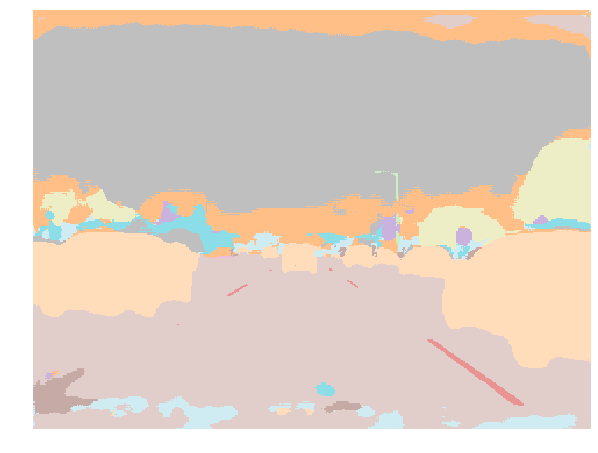

In [20]:
img = open_image(path_vidFrames/'frame6020.jpg')
crop_pad(img, (390, 640), 'border', 0., 0.)
brightness(img, 0.71)
pred = learn.predict(img)
pred[0].show(figsize=(10,10))

#### Save image in black and white:

- in black and white: can you introduce color later?

In [52]:
# This converts image to a matrix with values matched to your classes!!! 
x = image2np(pred[0].data).astype(np.uint8)
xx = image2np(pred[0].data)
# PIL.ImageColor.Image.

In [53]:
PIL.Image.fromarray(x).save('pilTest.jpg')

#### Can you re-introduce color into image?

In [54]:
d = open_image('pilTest.jpg')

Can you turn image back into a matrix?

In [61]:
d = np.asarray(PIL.Image.open('pilTest.jpg'))

In [62]:
type(d)

numpy.ndarray

In [65]:
d

array([[ 3,  4,  4,  4, ...,  0,  7, 26, 35],
       [ 3,  3,  4,  4, ..., 11, 11, 17, 16],
       [ 3,  3,  3,  4, ..., 18, 14, 13,  7],
       [ 3,  3,  3,  3, ...,  0,  0,  1,  2],
       ...,
       [30, 26, 20, 17, ..., 17, 17, 17, 17],
       [19, 17, 15, 15, ..., 17, 17, 17, 17],
       [15, 14, 13, 15, ..., 17, 17, 17, 17],
       [17, 17, 17, 18, ..., 17, 17, 17, 17]], dtype=uint8)

In [63]:
dIm = PIL.Image.fromarray(np.uint8(d))

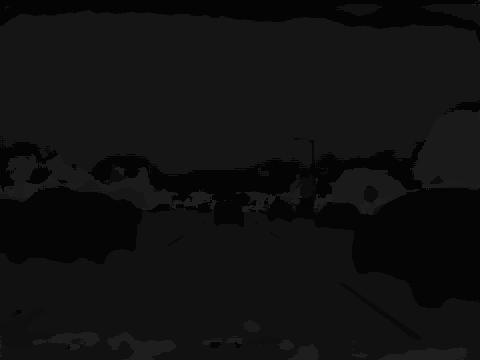

In [64]:
dIm

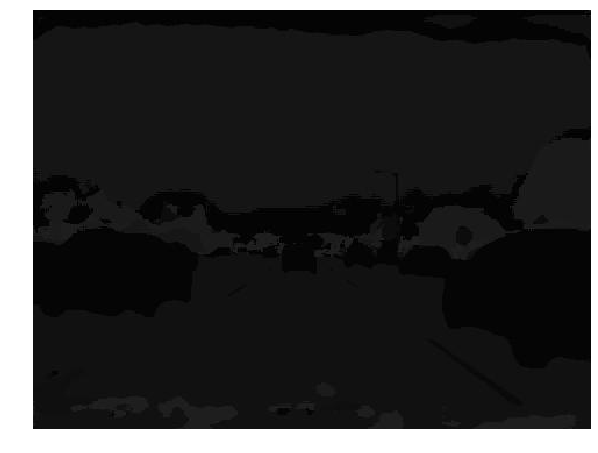

In [58]:
d.show(figsize=(10,10))

In [41]:
x.shape

(360, 480)

In [51]:
x

array([[252, 252, 252, 252, ..., 252, 252, 230, 230],
       [252, 252, 252, 252, ..., 252, 252, 230, 230],
       [252, 252, 252, 252, ..., 226, 252, 252, 252],
       [252, 252, 252, 252, ..., 252, 252, 252, 252],
       ...,
       [226, 226, 239, 239, ..., 239, 239, 239, 239],
       [239, 239, 239, 239, ..., 239, 239, 239, 239],
       [239, 239, 239, 239, ..., 239, 239, 239, 239],
       [239, 239, 239, 239, ..., 239, 239, 239, 239]], dtype=uint8)

In [36]:
type(xx)

numpy.ndarray

In [37]:
type(x)

numpy.ndarray

#### Save image in color

Object `show` not found.


In [14]:
# pred[0].save('test.jpg')
type(pred[0])

fastai.vision.image.ImageSegment

In [28]:
t = pred[0]

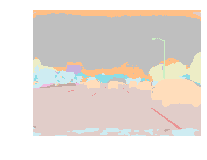

In [30]:
t.show()

In [20]:
type(pred)

tuple

In [ ]:
d = open_image('test.jpg')

In [ ]:
im_1 = Image.open('test.jpg')

arr = array(im_1)
arr

In [ ]:
mat = d.shape
mat
# from PIL import Image as PImage
# from fastai.vision import *

# frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
# pil_im = PImage.fromarray(frame) 
# x = pil2tensor(pil_im ,np.float32)
# preds_num = learn.predict(Image(x))[2].numpy()

#### Save Matrices to harddrive
- Can you save matrices to text file
- Can you remake a segmented image from a matrix?

In [20]:
type(pred[0])

fastai.vision.image.ImageSegment

In [21]:
pred[0].shape

torch.Size([1, 360, 480])

In [ ]:
pred

### Destroy comma-Ai images, then recreate frames

# LSTM SECTION

#### Create datablock
- Match labels (speeds) to images

#### Create databunch

#### LSTM model (class: init, forward method)
- Add Lucas-Kanade optical flow here???
- BPTT: include Means Squared Error as your loss function here

#### Create learner

- fit to one_cycle
- Set learning rate